**The dataset**
$$(X,Y)$$
 $m$ is the number of training examples in the dataset\
 The target $Y$ is 0 or 1

**The model**
$$F(X)=Xθ$$
$$θ = (w,b)^T$$
D'ont forget to add a vector of ones to X

**The Sigmoid function**
$$g(z) = \frac{1}{1+e^{-z}}$$

$$0<g(z)<1$$


**The cost function**

The squared error cost is not a good choice in logistic regression , because it's not convexe. We will use the loss function:
$$
\begin{equation}
  loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = \begin{cases}
    - \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=1$}\\
    - \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) & \text{if $y^{(i)}=0$}
  \end{cases}
\end{equation}$$

where $f_{\mathbf{w},b}(\mathbf{x}^{(i)}) = g(\mathbf{w} \cdot\mathbf{x}^{(i)}+b)$

The loss function above can be rewritten to be easier to implement.\
$$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right)$$
$$J(θ)=\frac{1}{m}\sum\limits_{i = 1}^{m}  loss(g(Xθ),Y)$$

**Gradient**
$$∇J(θ)=\frac{1}{m}X^T(g(Xθ)-Y)$$

**Gradient descent**
$$θ ← θ-α∇J(θ)$$

We will fit the logistic regression parameters  (w,b)  to our dataset.

**Import packages**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Dataset**

In [ ]:
# generate a random dataset
np.random.seed(42)
X = np.random.randn(100, 2)
Y = np.zeros((100, 1))
Y[X[:, 0] + X[:, 1] > 0] = 1
# initialize the model parameters
T = np.random.randn(3, 1)

**Model**

In [ ]:
def model(X, T):
  return np.dot(X,T)

**The sigmoid function**

In [ ]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z))

**The cost function (log loss)**

In [ ]:
def loss(X, Y, T):
  z = model(X,T)
  h = sigmoid(z)
  return (-Y * np.log(h) - (1-Y) * np.log(1-h)).mean()

**The gradient**

In [ ]:
def compute_gradient(h, X, Y):
  return 1/len(Y)*np.dot(np.transpose(X), h - Y)

**The gradient descent**

In [ ]:
def gradient_descent(X, Y, T, learning_rate, num_iterations):
  history = np.zeros(num_iterations)
  for i in range(num_iterations):
    z = model(X,T)
    h = sigmoid(z)   
    T = T - learning_rate * compute_gradient(h, X, Y)
    history[i] = loss(X,Y,T)
  return T , history

**Application**

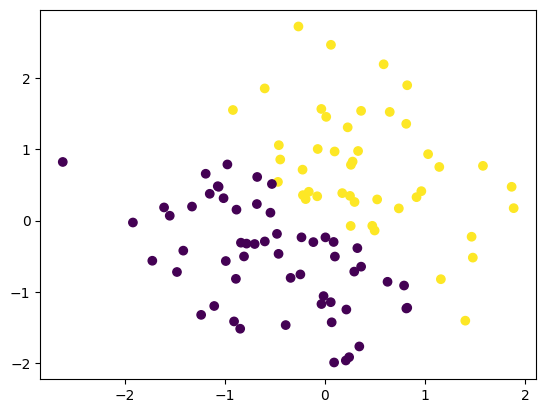

In [ ]:
# Plot before applying the learning algorithm
plt.scatter(X[:,0], X[:, 1], c=Y)

In [ ]:
# Define the hyperparameters
learning_rate = 0.1
num_iterations = 1000
X_ = np.c_[np.ones((len(X), 1)), X]
# Apply the descent gradient algorithm
T,history = gradient_descent(X_, Y, T, learning_rate, num_iterations)

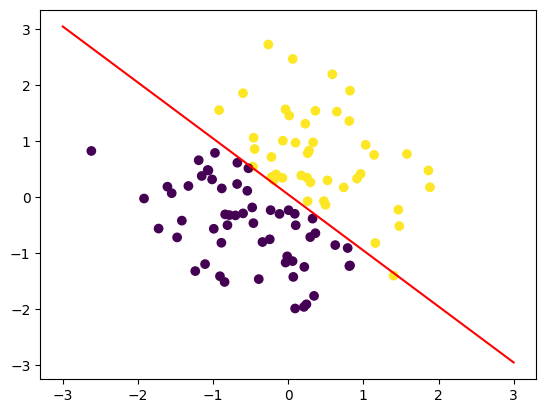

In [ ]:
# Plot after applying the learning algorithm
plt.scatter(X[:, 0], X[:, 1], c=Y.flatten())
x_axis = np.linspace(-3, 3, 100)
y_axis = - (T[0][0] + T[1][0] * x_axis) / T[2][0]
plt.plot(x_axis, y_axis, 'r')
plt.show()

Visualization of the Sigmoid function



Text(0.5, 0, 'z')

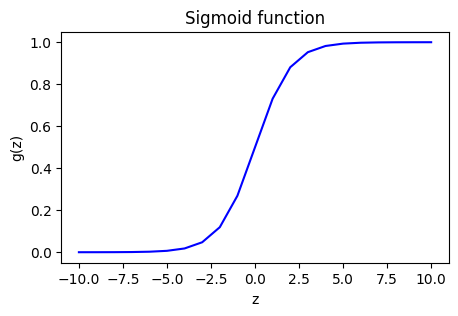

In [ ]:
# Generate an array of evenly spaced values between -10 and 10
z = np.arange(-10,11)
# Use the function implemented above to get the sigmoid values
g = sigmoid(z)
# Plot z vs sigmoid(z)
fig,ax = plt.subplots(1,1,figsize=(5,3))
ax.plot(z, g, c="b")
ax.set_title("Sigmoid function")
ax.set_ylabel('g(z)')
ax.set_xlabel('z')